In [1]:
import os 
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
import matplotlib.cm as cm

from sklearn.cluster import AgglomerativeClustering, SpectralClustering, KMeans, MeanShift, Birch, AffinityPropagation, MiniBatchKMeans, DBSCAN

In [16]:
bleeding_path = "proc_versions/clip_img/"
wh = []
for file in os.listdir(bleeding_path):
    if "yolo.txt" in file:
        with open(bleeding_path+file,"r") as f: bbox = f.readlines()[0]
        wh.append(tuple(int(float(i)*800) for i in bbox.split()[2:]))

wh = np.asarray(list(set(wh))) ###array of all the width and height
wh.shape 

(314, 2)

In [18]:
np.savetxt('wh.txt', wh) ### saving as txt for reference

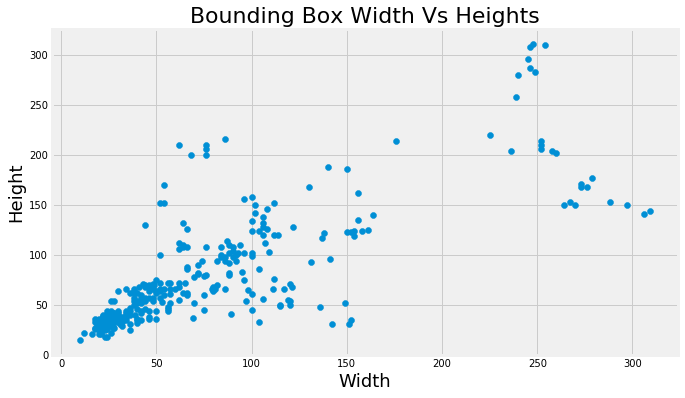

In [19]:
plt.figure(figsize=(10,6))
plt.scatter(x = wh[:,0], y = wh[:,1])
plt.title("Bounding Box Width Vs Heights", fontsize = 22)
plt.xlabel("Width", fontsize = 18)
plt.ylabel("Height", fontsize = 18);

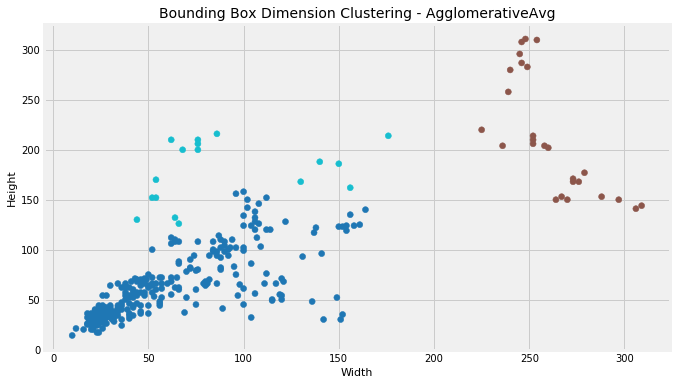

In [29]:
clustering = AgglomerativeClustering(linkage="complete", n_clusters=3)
clustering.fit(wh)
plt.figure(figsize=(10,6))
plt.scatter(x = wh[:,0], y = wh[:,1], c=clustering.labels_, cmap = cm.tab10)
plt.title("Bounding Box Dimension Clustering - "+name, fontsize = 14)
plt.xlabel("Width", fontsize = 11)
plt.ylabel("Height", fontsize = 11);

In [30]:
nc = 3
clusterings = {
"Spectral" : SpectralClustering(n_clusters=nc),
"Kmeans" : KMeans(n_clusters=nc),
"Birch" : Birch(n_clusters=nc),
"AgglomerativeComplete" : AgglomerativeClustering(linkage="complete", n_clusters=nc),
"AgglomerativeWard" : AgglomerativeClustering(linkage="ward", n_clusters=nc),
"AgglomerativeAvg" : AgglomerativeClustering(linkage="average", n_clusters=nc)
}

### Will change the clusters and find the apt clusters later

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\spectral_embedding_.py:237: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\spectral.py:268: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  n_init=n_init)


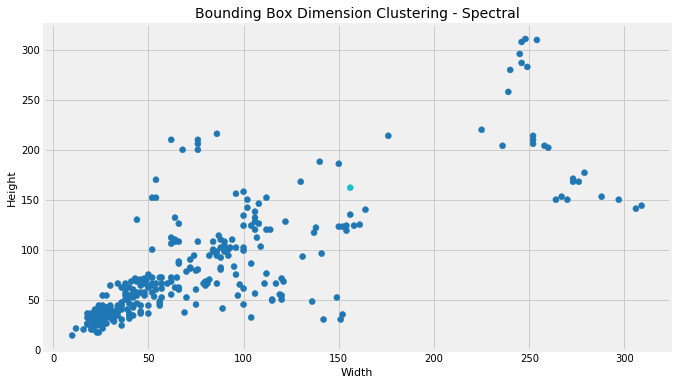

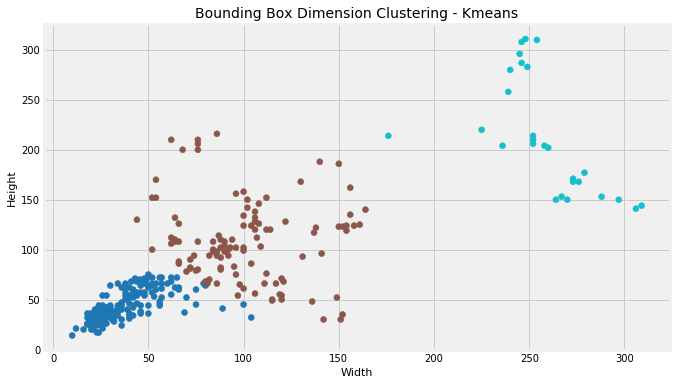

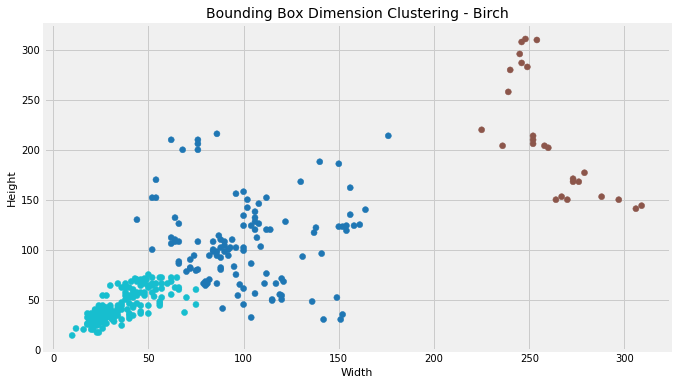

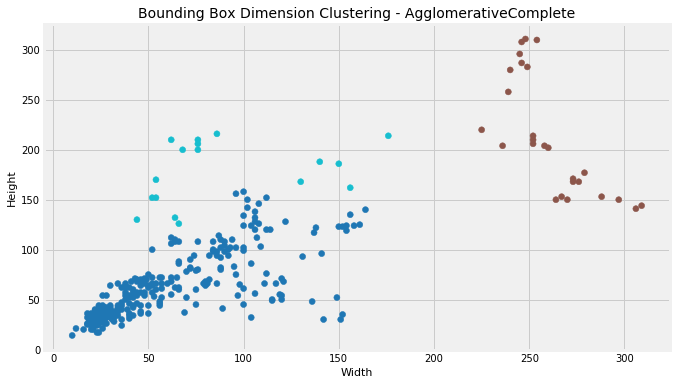

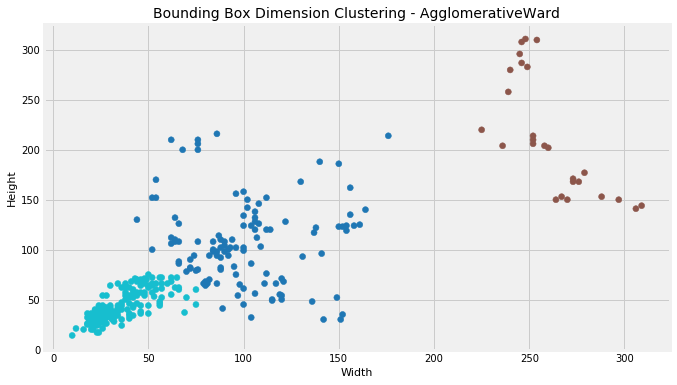

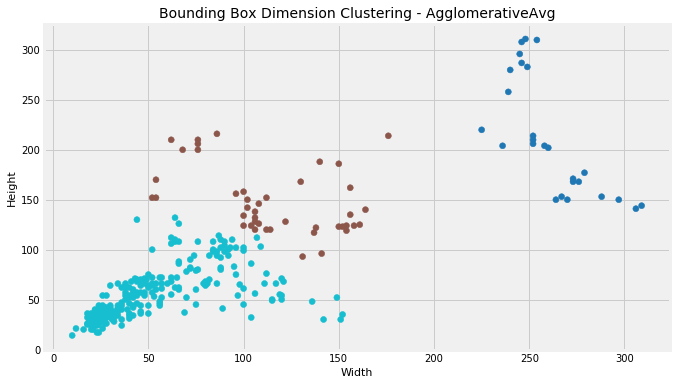

In [31]:
for name,clustering in clusterings.items():
    clustering.fit(wh)
    plt.figure(figsize=(10,6))
    plt.scatter(x = wh[:,0], y = wh[:,1], c=clustering.labels_, cmap = cm.tab10)
    plt.title("Bounding Box Dimension Clustering - "+name, fontsize = 14)
    plt.xlabel("Width", fontsize = 11)
    plt.ylabel("Height", fontsize = 11);

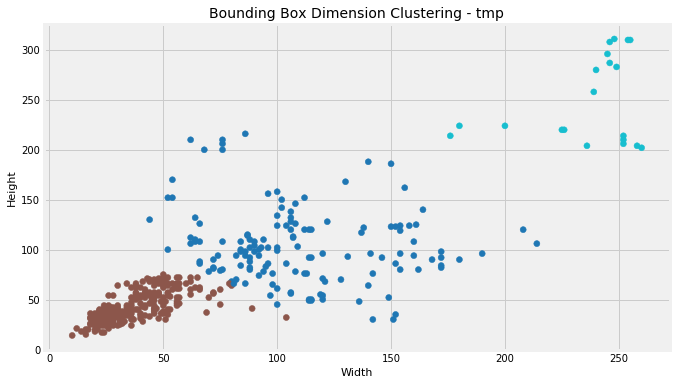

In [18]:
name = "tmp"
clustering = KMeans(n_clusters=3)
clustering.fit(wh)
plt.figure(figsize=(10,6))
plt.scatter(x = wh[:,0], y = wh[:,1], c=clustering.labels_, cmap = cm.tab10)
plt.title("Bounding Box Dimension Clustering - "+name, fontsize = 14)
plt.xlabel("Width", fontsize = 11)
plt.ylabel("Height", fontsize = 11);

#### Selecting Agglomerative Clustering with complete linkage for now. Probably the number fo clusters less than 9 would work better too. Will revisit after changing YOLO code.

In [32]:
clustering = KMeans(n_clusters=nc)
clustering.fit(wh)
wh_clst = np.hstack((wh,clustering.labels_.reshape(-1,1)))
wh_clst.shape

wh_clst = pd.DataFrame(wh_clst, columns=["width", 'height', 'cluster'])
wh_clst.head(3)

wh_clst_grp = wh_clst.groupby('cluster').mean().astype(int)
wh_clst_grp.sort_values(by="width")

anchors3 = [37,44, 100,108, 258,212]

In [35]:
clustering = AgglomerativeClustering(linkage="complete",n_clusters=9)
clustering.fit(wh)
wh_clst = np.hstack((wh,clustering.labels_.reshape(-1,1)))
wh_clst.shape

wh_clst = pd.DataFrame(wh_clst, columns=["width", 'height', 'cluster'])
wh_clst.head(3)

wh_clst_grp = wh_clst.groupby('cluster').mean().astype(int)
wh_clst_grp.sort_values(by="width")


anchors9 = [37,44,  64,175,  83,96,  117,52,  124,128,  150,183,  245,291,  247,208,  282,256]